<a href="https://colab.research.google.com/github/swethanjali24/CNN/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import to_categorical


In [86]:
# Loading the data

from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [87]:
# Knowing the shape of the model
print('Training shape-',X_train.shape,y_train.shape)
print('Testing shape-',X_test.shape,y_test.shape)

Training shape- (60000, 28, 28) (60000,)
Testing shape- (10000, 28, 28) (10000,)


In [88]:
# Training data contains 60K images with 28*28 pixels with grayscale and testing data with 10K images of 28*28 pixels.

In [89]:
# Finding the unique classes
Classes=np.unique(y_train)
print('Total number of unique classes in train-',Classes)
nClasses=len(Classes)
print('Number of classes-',nClasses)

Classes_1=np.unique(y_test)
print('Total number of unique classes in test-',Classes_1)
nClasses_1=len(Classes_1)
print('Number of classes-',nClasses_1)

Total number of unique classes in train- [0 1 2 3 4 5 6 7 8 9]
Number of classes- 10
Total number of unique classes in test- [0 1 2 3 4 5 6 7 8 9]
Number of classes- 10


Text(0.5, 1.0, 'y_test[0]:,9')

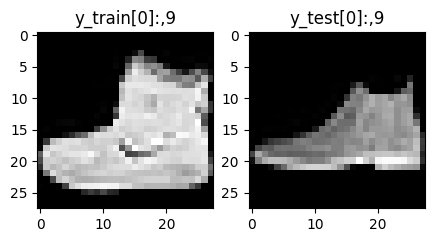

In [90]:
# Showing the images

plt.figure(figsize=(5,3))
plt.subplot(121)
plt.imshow(X_train[0],cmap='gray')
plt.title(f"y_train[0]:,{y_train[0]}")
plt.subplot(122)
plt.imshow(X_test[0],cmap='gray')
plt.title(f"y_test[0]:,{y_test[0]}")



In [91]:
# Normalizing the data

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

# reshape( as convolution layer expects a 4D input shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [92]:
# one hot encoding

y_train_one_hot=to_categorical(y_train,num_classes=10)
y_test_one_hot=to_categorical(y_test,num_classes=10)

In [93]:
print('Target variable;',y_train[9])
print('Target variable after one hot:',y_train_one_hot[9])

Target variable; 5
Target variable after one hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [94]:
# Model Building
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [95]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
# Evaluation

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
history=model.fit(X_train,y_train_one_hot,batch_size=128,epochs=6,verbose=1,validation_data=(X_test,y_test_one_hot))

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 153s 318ms/step - accuracy: 0.6512 - loss: 0.9483 - val_accuracy: 0.8554 - val_loss: 0.4015
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 326ms/step - accuracy: 0.8475 - loss: 0.4179 - val_accuracy: 0.8829 - val_loss: 0.3228
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 190s 300ms/step - accuracy: 0.8758 - loss: 0.3368 - val_accuracy: 0.8925 - val_loss: 0.2860
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 297ms/step - accuracy: 0.8868 - loss: 0.3077 - val_accuracy: 0.9029 - val_loss: 0.2624
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 306ms/step - accuracy: 0.8967 - loss: 0.2848 - val_accuracy: 0.9047 - val_loss: 0.2577
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 289ms/step - accuracy: 0.9025 - loss: 0.2668 - val_accuracy: 0.9088 - val_loss: 0.2427


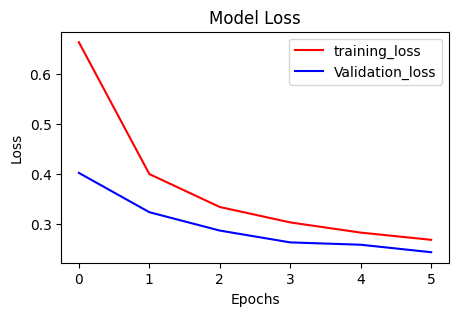

In [100]:
# Plotting loss curve
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training_loss','Validation_loss'])

Text(0.5, 0, 'Epochs')

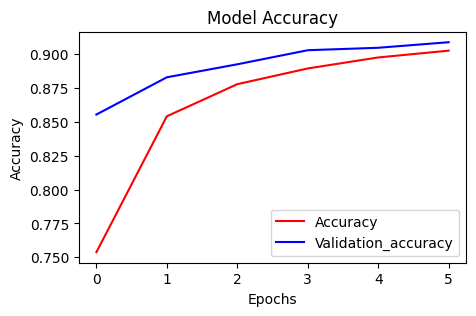

In [102]:
# Plotting accuracy curves

plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Model Accuracy')
plt.legend(['Accuracy','Validation_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [97]:
# We can clearly see from the graphs that as the no.of epochs increases the loss is decreasing and hence the accuracy is increasing,so the model buitl is a good model.